# 1. Preparation of Data and Metadata

## 1.1 Prepare the Idx_to_Feature_Name File

For later work we make a dictionary of the csv.

In [1]:
# import dependencies
import csv

In [7]:
IDX_TO_FEATURE_NAME_FILE = "Files\metadata\idx_to_feature_name.csv"

In [13]:
def create_indices_dict(csv_file):
    indices_dict = {}
    with open(csv_file, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            index = int(row[0])
            feature_name_parts = row[1].split('_')
            feature_name = '_'.join(feature_name_parts[:-1]).lower()  # Extract feature name without the number suffix and convert to lowercase
            if feature_name not in indices_dict:
                indices_dict[feature_name] = (index, index)
            else:
                start_idx, _ = indices_dict[feature_name]
                indices_dict[feature_name] = (start_idx, index)
    return indices_dict

indices_dict = create_indices_dict(IDX_TO_FEATURE_NAME_FILE)
print(indices_dict)

{'bandwidth': (0, 0), 'centroid': (1, 1), 'contrast': (2, 8), 'energy': (9, 9), 'flatness': (10, 10), 'flux': (11, 11), 'melspect': (12, 75), 'mfcc': (76, 107), 'mfcc_d': (108, 139), 'mfcc_d2': (140, 171), 'power': (172, 172), 'yin': (173, 173), 'zcr': (174, 174)}


In [15]:
def get_feature_indices(feature_name, indices_dict):
    lower_feature_name = feature_name.lower()
    for key in indices_dict.keys():
        if lower_feature_name == key.lower():
            return indices_dict[key], ""
    return (), f"Error: {feature_name} not found in the indices dictionary."

In [19]:
# Example usage:
feature_name = "contrast"

indices, error_message = get_feature_indices(feature_name, indices_dict)
if indices:
    print(f"The indices for {feature_name} are: {indices}")
else:
    print(error_message)

The indices for contrast are: (2, 8)


In [54]:
def print_feature_names(dictionary):
    print("The feature names are:")
    print("")
    for key, value in dictionary.items():
        print(f"{key}")

print_feature_names(indices_dict)

The feature names are:

bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr


## 1.2 Prepare the Development File

For later work we make a dictionary of the csv. 

In [26]:
import csv
from unidecode import unidecode  # Import the unidecode library

In [22]:
DEVELOPMENT_FILE = "Files\metadata\development.csv"

In [35]:
def replace_special_characters(word):
    # Replace special characters with ASCII equivalents
    word = word.replace('ö', 'oe').replace('ä', 'ae').replace('ü', 'ue').replace('ß', 'ss')
    return word

def create_word_id_dictionary(csv_file):
    word_id_dict = {}
    with open(csv_file, newline='', encoding='utf-8') as csvfile:  # Specify UTF-8 encoding
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            word = replace_special_characters(row['word'])
            word_id_dict.setdefault(word, []).append(int(row['id']))
    return word_id_dict

# Example usage:
word_id_dict = create_word_id_dictionary(DEVELOPMENT_FILE)

# Print the dictionary
for word, ids in word_id_dict.items():
    print(f"{word}: {ids}")

Broetchen: [0, 13, 18, 67, 80, 93, 98, 147, 160, 173, 178, 227, 240, 253, 258, 307, 320, 333, 338, 387, 400, 413, 418, 467, 480, 493, 498, 547, 560, 573, 578, 627, 640, 653, 658, 707, 720, 733, 738, 787, 800, 812, 817, 864, 877, 890, 895, 944, 957, 970, 975, 1024, 1037, 1053, 1102, 1115, 1128, 1133, 1182, 1195, 1208, 1213, 1262, 1275, 1288, 1293, 1342, 1355, 1368, 1373, 1422, 1435, 1448, 1453, 1502, 1515, 1527, 1532, 1581, 1593, 1606, 1611, 1659, 1672, 1685, 1690, 1739, 1752, 1765, 1770, 1819, 1832, 1845, 1850, 1899, 1912, 1925, 1930, 1979, 1992, 2005, 2010, 2059, 2072, 2085, 2090, 2139, 2152, 2165, 2170, 2219, 2232, 2245, 2250, 2299, 2312, 2325, 2330, 2379, 2392, 2405, 2410, 2459, 2472, 2485, 2490, 2539, 2552, 2565, 2570, 2619, 2632, 2645, 2650, 2699, 2712, 2725, 2730, 2779, 2792, 2805, 2851, 2864, 2877, 2882, 2931, 2944, 2957, 2962, 3011, 3024, 3037, 3042, 3091, 3104, 3117, 3122, 3171, 3184, 3197, 3202, 3251, 3264, 3277, 3282, 3331, 3344, 3357, 3362, 3411, 3424, 3437, 3442, 3491, 350

In [49]:
def search_class(word, word_id_dict):
    word = replace_special_characters(word)
    for key in word_id_dict.keys():
        if word == key:
            return word_id_dict[word], ""
    return [], f"Error: \"{word}\" not found in the indices dictionary."

# Example usage:
search_word = "Broetchen"
word_list, error_message = search_class(search_word, word_id_dict)
if word_list:
    max_elements = 5
    display_list = word_list[:max_elements] + ['...'] if len(word_list) > max_elements else word_list
    print(f"The 5 first ids in the list for \"{search_word}\" are: {display_list}")
else:
    print(error_message)


The 5 first ids in the list for "Broetchen" are: [0, 13, 18, 67, 80, '...']


In [53]:
def print_key_lengths(dictionary):
    print("The size of the different samples of each key are:")
    print("")
    for key, value in dictionary.items():
        print(f"{key}: {len(value)}")

print_key_lengths(word_id_dict)

The size of the different samples of each key are:

Broetchen: 2038
kann: 2038
Staubsauger: 2038
Spiegel: 2040
Alarm: 2042
Lueftung: 2045
Ofen: 2044
Haus: 2042
Heizung: 2036
Fernseher: 2046
Schraube: 2046
Licht: 2044
aus: 2041
nicht: 2045
warm: 2040
an: 2041
Leitung: 2045
offen: 2039
wunderbar: 2042
Radio: 2042
other: 4462


## 1.3 Combine the Numpy IDs with the WAV Files

In [56]:
import os
from glob import glob

In [57]:
WAV_DIR = "Files/MLPC24_speech_commands_raw_waveforms"

In [98]:
def load_audio_files(directory):
    audio_files = glob(os.path.join(directory, "*", "*.wav"))
    annotated_classes_dict = {}
    for file in audio_files:
        annotated_class = os.path.basename(os.path.dirname(file))
        annotated_classes_dict.setdefault(annotated_class, []).append(file)
    return annotated_classes_dict

def print_list_in_rows(lst, items_per_row):
    print("[")
    for i in range(0, len(lst), items_per_row):
        row = lst[i:i+items_per_row]
        print("" + ", ".join(row), end=",\n" if i + items_per_row < len(lst) else "\n")
    print("]")
        
# Example usage:
search_word = "Alarm"
max_elements = 5
display_list = annotated_classes_dict[search_word][:max_elements] + ['...'] if len(annotated_classes_dict[search_word]) > max_elements else annotated_classes_dict[search_word]

print("")
print(f"The 5 first ids in the list for dict key \"{search_word}\" are:")
print_list_in_rows(display_list, items_per_row=1)


The 5 first ids in the list for dict key "Alarm" are:
[
Files/MLPC24_speech_commands_raw_waveforms\Alarm\1.wav,
Files/MLPC24_speech_commands_raw_waveforms\Alarm\10.wav,
Files/MLPC24_speech_commands_raw_waveforms\Alarm\100.wav,
Files/MLPC24_speech_commands_raw_waveforms\Alarm\1000.wav,
Files/MLPC24_speech_commands_raw_waveforms\Alarm\1001.wav,
...
]


In [83]:
WAV_DIR = "Files/MLPC24_speech_commands_raw_waveforms"

In [96]:
def word_exists_in_dict(word, dictionary):
    return word in dictionary

def construct_wav_file_path(class_dir, class_label, id_wav_file):
    return os.path.join(class_dir, class_label, f"{id_wav_file}.wav")

# Example usage:
word = "Alarm"
file_id = 1
if word_exists_in_dict(word, word_id_dict):
    wav_filepath = construct_wav_file_path(WAV_DIR, word, file_id)
    print(f"The filepath is: {wav_filepath}")
else:
    print(f"\"{word}\" doesnt exist in class labels!")

The filepath is: Files/MLPC24_speech_commands_raw_waveforms\Alarm\1.wav


In [95]:
def extract_class_and_id(filepath):
    # Split the filepath into directory and filename using os.path.split()
    directory, filename = os.path.split(filepath)
    
    # Get the class label and ID from the filename
    class_label = os.path.basename(directory)
    id_, _ = os.path.splitext(filename)  # Extract ID without the extension
    
    return (class_label, id_)

# Example usage:
filepath = "Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav"
class_label, id_ = extract_class_and_id(filepath)
print(f"Class label: ({class_label}, {id_})")


Class label: (Alarm, 1)


### 1.3.2 Output general informations about the dataset

Size of the WAV Files for each class

In [104]:
def count_files_in_directory(directory):
    file_list = glob(f"{directory}/**", recursive=True)
    file_count = sum(1 for f in file_list if not os.path.isdir(f))
    return file_count

# Example usage:
directory = "Files/MLPC24_speech_commands_raw_waveforms"
total_files = count_files_in_directory(directory)
print(f"Total number of files in directory '{directory}': {total_files}")
print("")
annotated_classes_dict = load_audio_files(WAV_DIR)
for annotated_class, files in annotated_classes_dict.items():
    print(f"{annotated_class}: {len(files)} files")

Total number of files in directory 'Files/MLPC24_speech_commands_raw_waveforms': 45296

Alarm: 2042 files
an: 2041 files
aus: 2041 files
Brötchen: 2038 files
Fernseher: 2046 files
Haus: 2042 files
Heizung: 2036 files
kann: 2038 files
Leitung: 2045 files
Licht: 2044 files
Lüftung: 2045 files
nicht: 2045 files
Ofen: 2044 files
offen: 2039 files
other: 4462 files
Radio: 2042 files
Schraube: 2046 files
Spiegel: 2040 files
Staubsauger: 2038 files
warm: 2040 files
wunderbar: 2042 files


Size of the numpy data

In [105]:
import numpy as np

In [110]:
dataset_audio = np.load("Files/development_numpy/development.npy")

# Output the size information
print(f"The dataset contains {dataset_audio.shape[0]} different samples, each divided into {dataset_audio.shape[1]} features and {dataset_audio.shape[2]} timestamps.")
print("\nThis means:")
print(f"- Samples: {dataset_audio.shape[0]}")
print(f"- Features per sample: {dataset_audio.shape[1]}")
print(f"- Timeframes per sample: {dataset_audio.shape[2]}")
print(f"\nShape of the dataset: {dataset_audio.shape}")


The dataset contains 45296 different samples, each divided into 175 features and 44 timestamps.

This means:
- Samples: 45296
- Features per sample: 175
- Timeframes per sample: 44

Shape of the dataset: (45296, 175, 44)


To get a sample of the dataset_audio, we just have to search for a wished classname id of the `word_id_dict` variable.

In [175]:
def get_numpy_array_with_id(data_dict, key, dataset_audio, list_id_ = None, id_=None):
    if key in data_dict:
        id_list = data_dict[key]
        
        if list_id_ is None:
            # id_ is None, take the 1. one in the list
            if id_ is None:
                id_ = id_list[0]
        else:
            id_ = id_list[list_id_]
            
        if id_ in id_list:
            return key, id_, dataset_audio[id_] 
        else:
            print(f"Error: ID '{id_}' not found for key '{key}' in the indices dictionary.")
    else: 
        print(f"Error: Key '{key}' not found in the indices dictionary.")
    
    return None

# Example usage:
data = get_numpy_array_with_id(word_id_dict, "Alarm", dataset_audio)
if data is not None:
    key, id_, numpy_array = data
    print(f"Found numpy array with key '{key}', ID '{id_}', {numpy_array.shape}")
else:
    print("Failed to retrieve numpy array.")

Found numpy array with key 'Alarm', ID '4', (175, 44)


# 2. Make a simple example with torchaudio to understand the numpy array data better

In [165]:
import IPython
import IPython.display as ipd
import torch
import torchaudio
import matplotlib.pyplot as plt
import random

## 2. 1 Play samples to test the audio dataset

In [166]:
# RANDOM

# random.seed(42)
my_test_key = "Alarm"
print(f"Play some random audio file of key {my_test_key}...")
print("")

# play audio file
audio_file = annotated_classes_dict[my_test_key][random.randint(0, len(annotated_classes_dict[search_word]))]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

Play some random audio file of key Alarm...

Files/MLPC24_speech_commands_raw_waveforms\Alarm\2544.wav


In [167]:
# NOT RANDOM, you can choose and it stays the same
my_test_key = "Alarm"
my_test_sample = 100

print(f"The max len to choose is: {len(annotated_classes_dict[my_test_key])}")

print(f"Play some random audio file of key {my_test_key}...")
print("")

# play audio file
audio_file = annotated_classes_dict[my_test_key][my_test_sample]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

The max len to choose is: 2042
Play some random audio file of key Alarm...

Files/MLPC24_speech_commands_raw_waveforms\Alarm\1113.wav


## 2.2 Now we want to combine torchaudio and numpy dataset and compare

In [168]:
my_test_key = "Alarm"
my_test_sample = 100

# play audio file
audio_file = annotated_classes_dict[my_test_key][my_test_sample]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

# load wav data into torchaudio
waveform, sample_rate = torchaudio.load(audio_file)

Files/MLPC24_speech_commands_raw_waveforms\Alarm\1113.wav


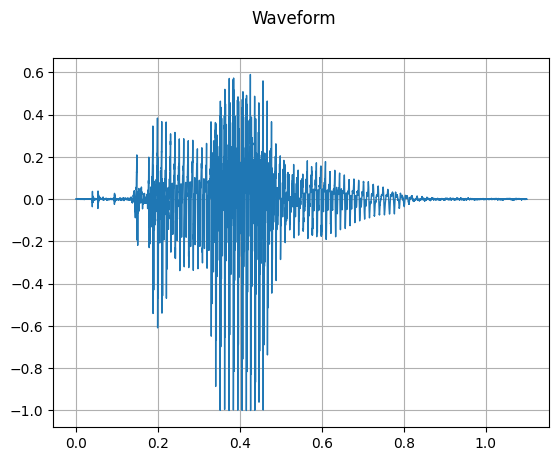

In [169]:
# from torchaudio

def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("Waveform")
    
plot_waveform(waveform, sample_rate)

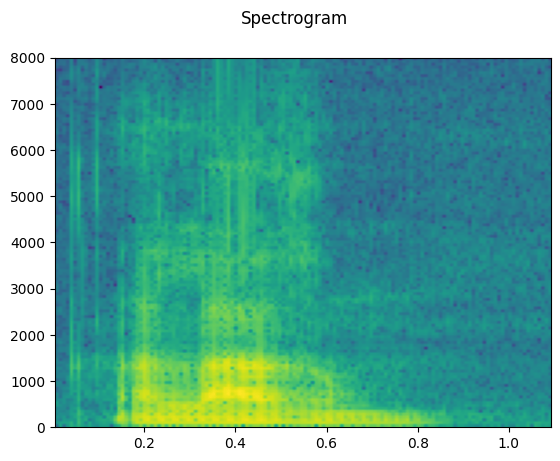

In [172]:
# from torchaudio

def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

plot_specgram(waveform, sample_rate)

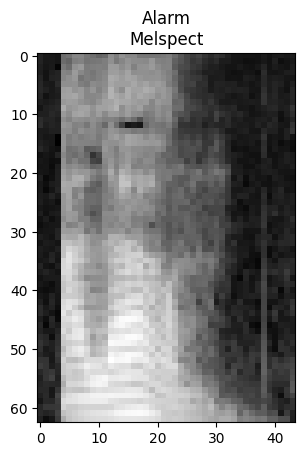

In [180]:
data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, my_test_sample)

plt.title(f"{data[0]}\nMelspect")
plt.imshow(np.flipud(data[2][12:75,:]), cmap="gray")

Spectograms looks similar! Means the "data understanding" is okay, there are no errors / misinterpretation of the numpy feature array! Thats good... :-)

## 2.3 Plot waveform matrix of wav file (altougth we do not take these features...)

In [237]:
def plot_waveform_matrix(audios):

    num_examples = len(audios)
    
    num_channels = audios[list(audios.keys())[0]][1].shape[0]  # Assuming all waveforms have the same number of channels

    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    
    for i, (k, v) in enumerate(audios.items()):
        filename, waveform, sample_rate = v
        
        row = i // 4
        col = i % 4

        waveform = waveform.numpy()
        num_frames = waveform.shape[1]
        time_axis = torch.arange(0, num_frames) / sample_rate

        for c in range(num_channels):
            axes[row, col].plot(time_axis, waveform[c], linewidth=1)
            axes[row, col].grid(True)
            axes[row, col].set_title(f"{os.path.basename(os.path.dirname(filename))}\nFile: {os.path.basename(filename)}")
            if num_channels > 1:
                axes[row, col].set_ylabel(f"Channel {c+1}")

    fig.suptitle("Waveforms")
    plt.tight_layout()

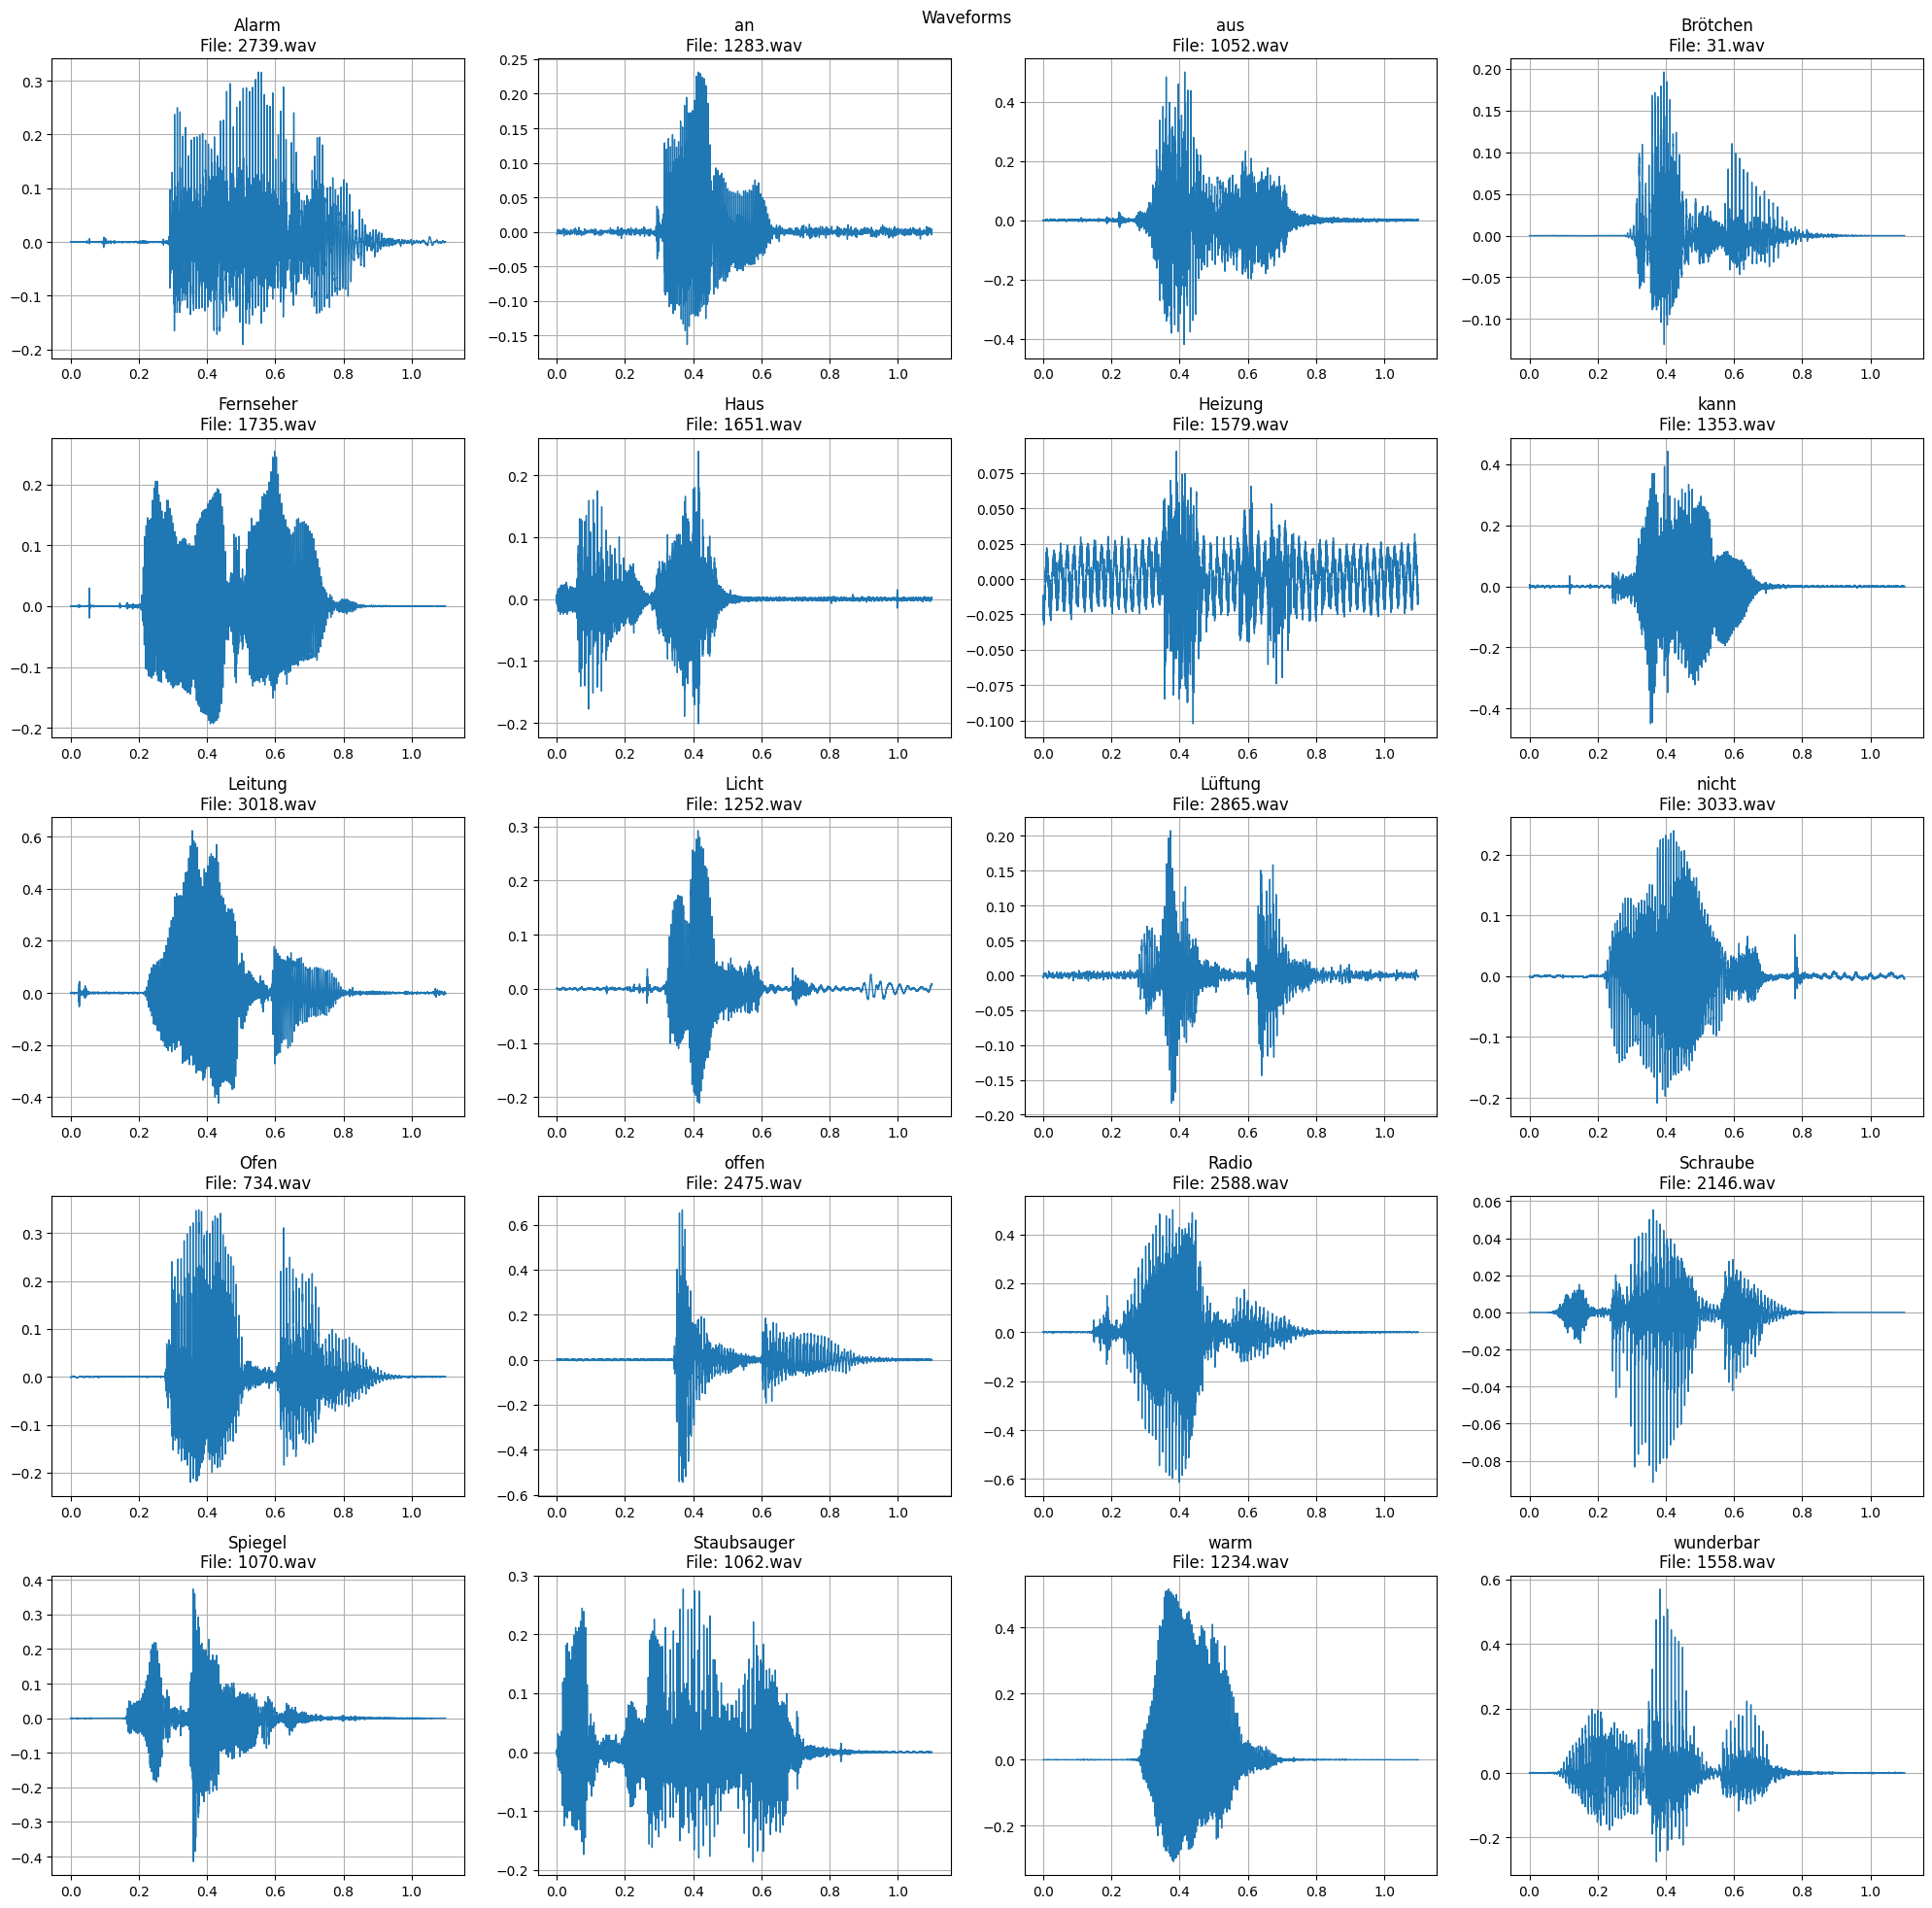

In [238]:
# RANDOM
random.seed(42)

audios = {}
for k, v in annotated_classes_dict.items():
    random_sample = random.randint(0, len(v))
    filename = v[random_sample]
    waveform, sample_rate = torchaudio.load(v[random_sample])
    audios[k] = (filename, waveform, sample_rate)

del audios["other"]

plot_waveform_matrix(audios)

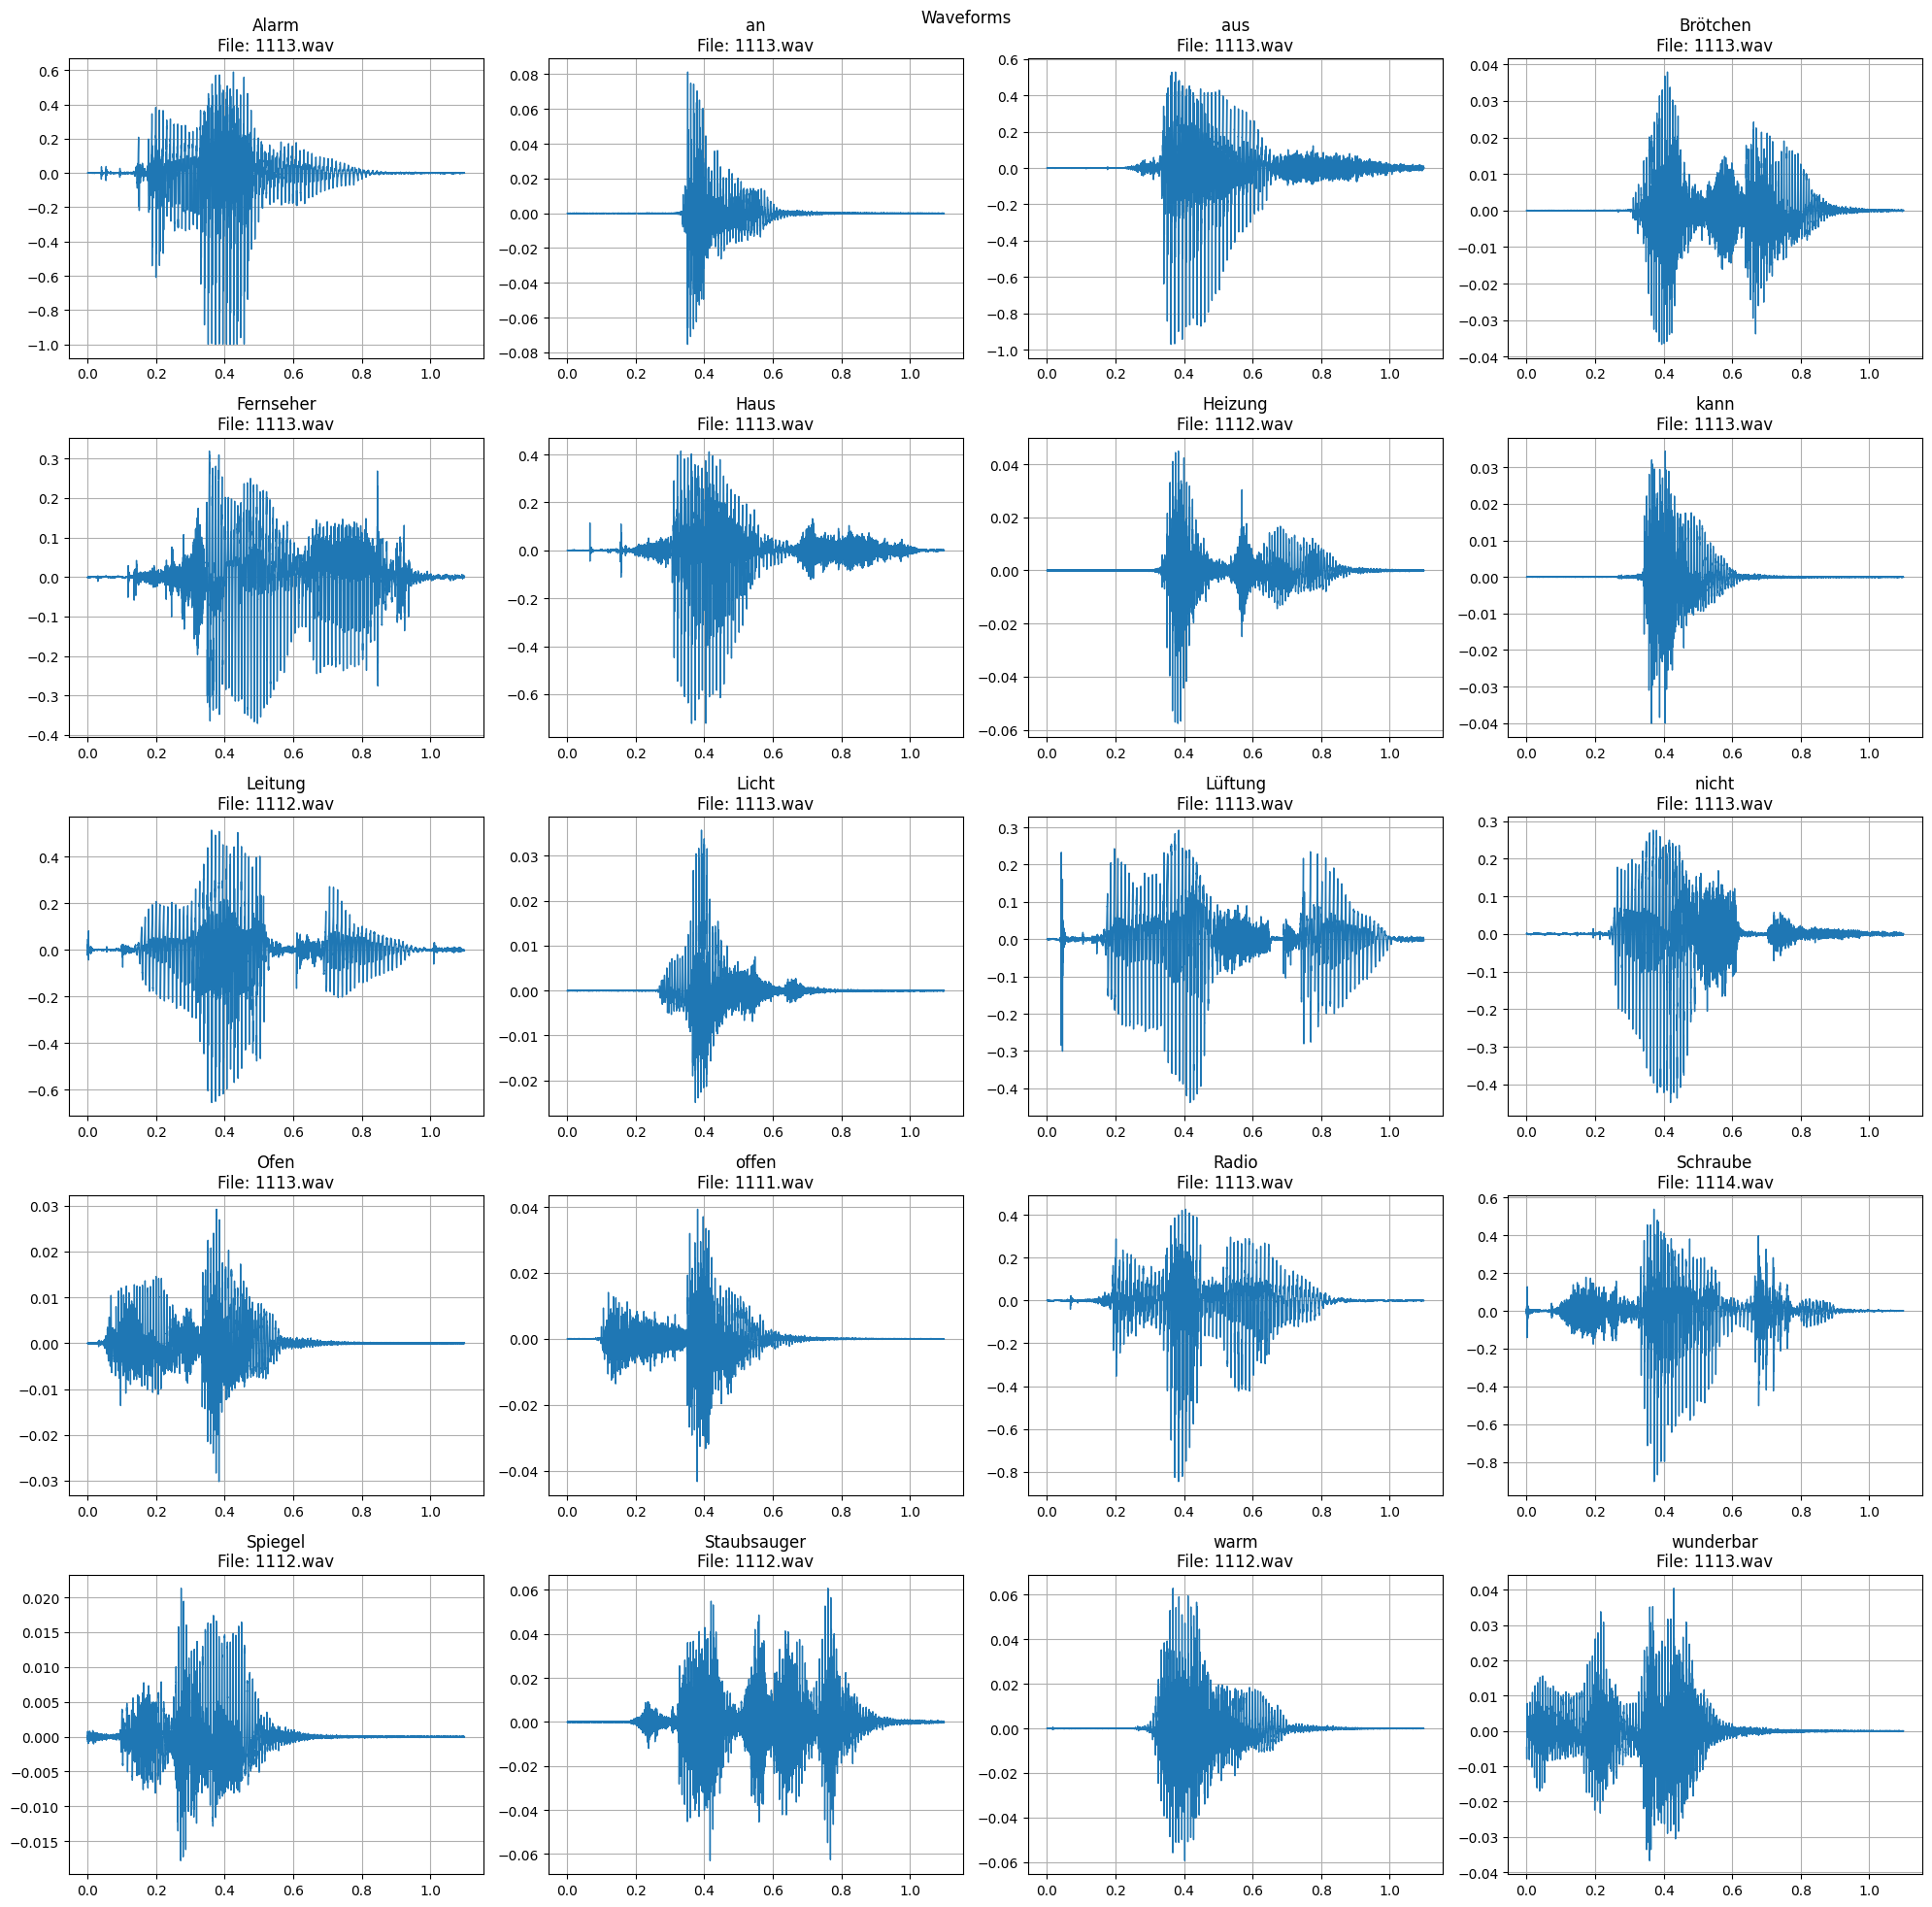

In [239]:
# NOT RANDOM
my_list_idx = 100

audios = {}
for k, v in annotated_classes_dict.items():
    filename = v[my_list_idx]
    waveform, sample_rate = torchaudio.load(v[my_list_idx])
    audios[k] = (filename, waveform, sample_rate)

del audios["other"]

plot_waveform_matrix(audios)

## 2.4 Now we want to compare samples from same class

In [240]:
# just for copying the key you need...
for annotated_class, files in annotated_classes_dict.items():
    print(f"{annotated_class}", end = "    ")

Alarm    an    aus    Brötchen    Fernseher    Haus    Heizung    kann    Leitung    Licht    Lüftung    nicht    Ofen    offen    other    Radio    Schraube    Spiegel    Staubsauger    warm    wunderbar    

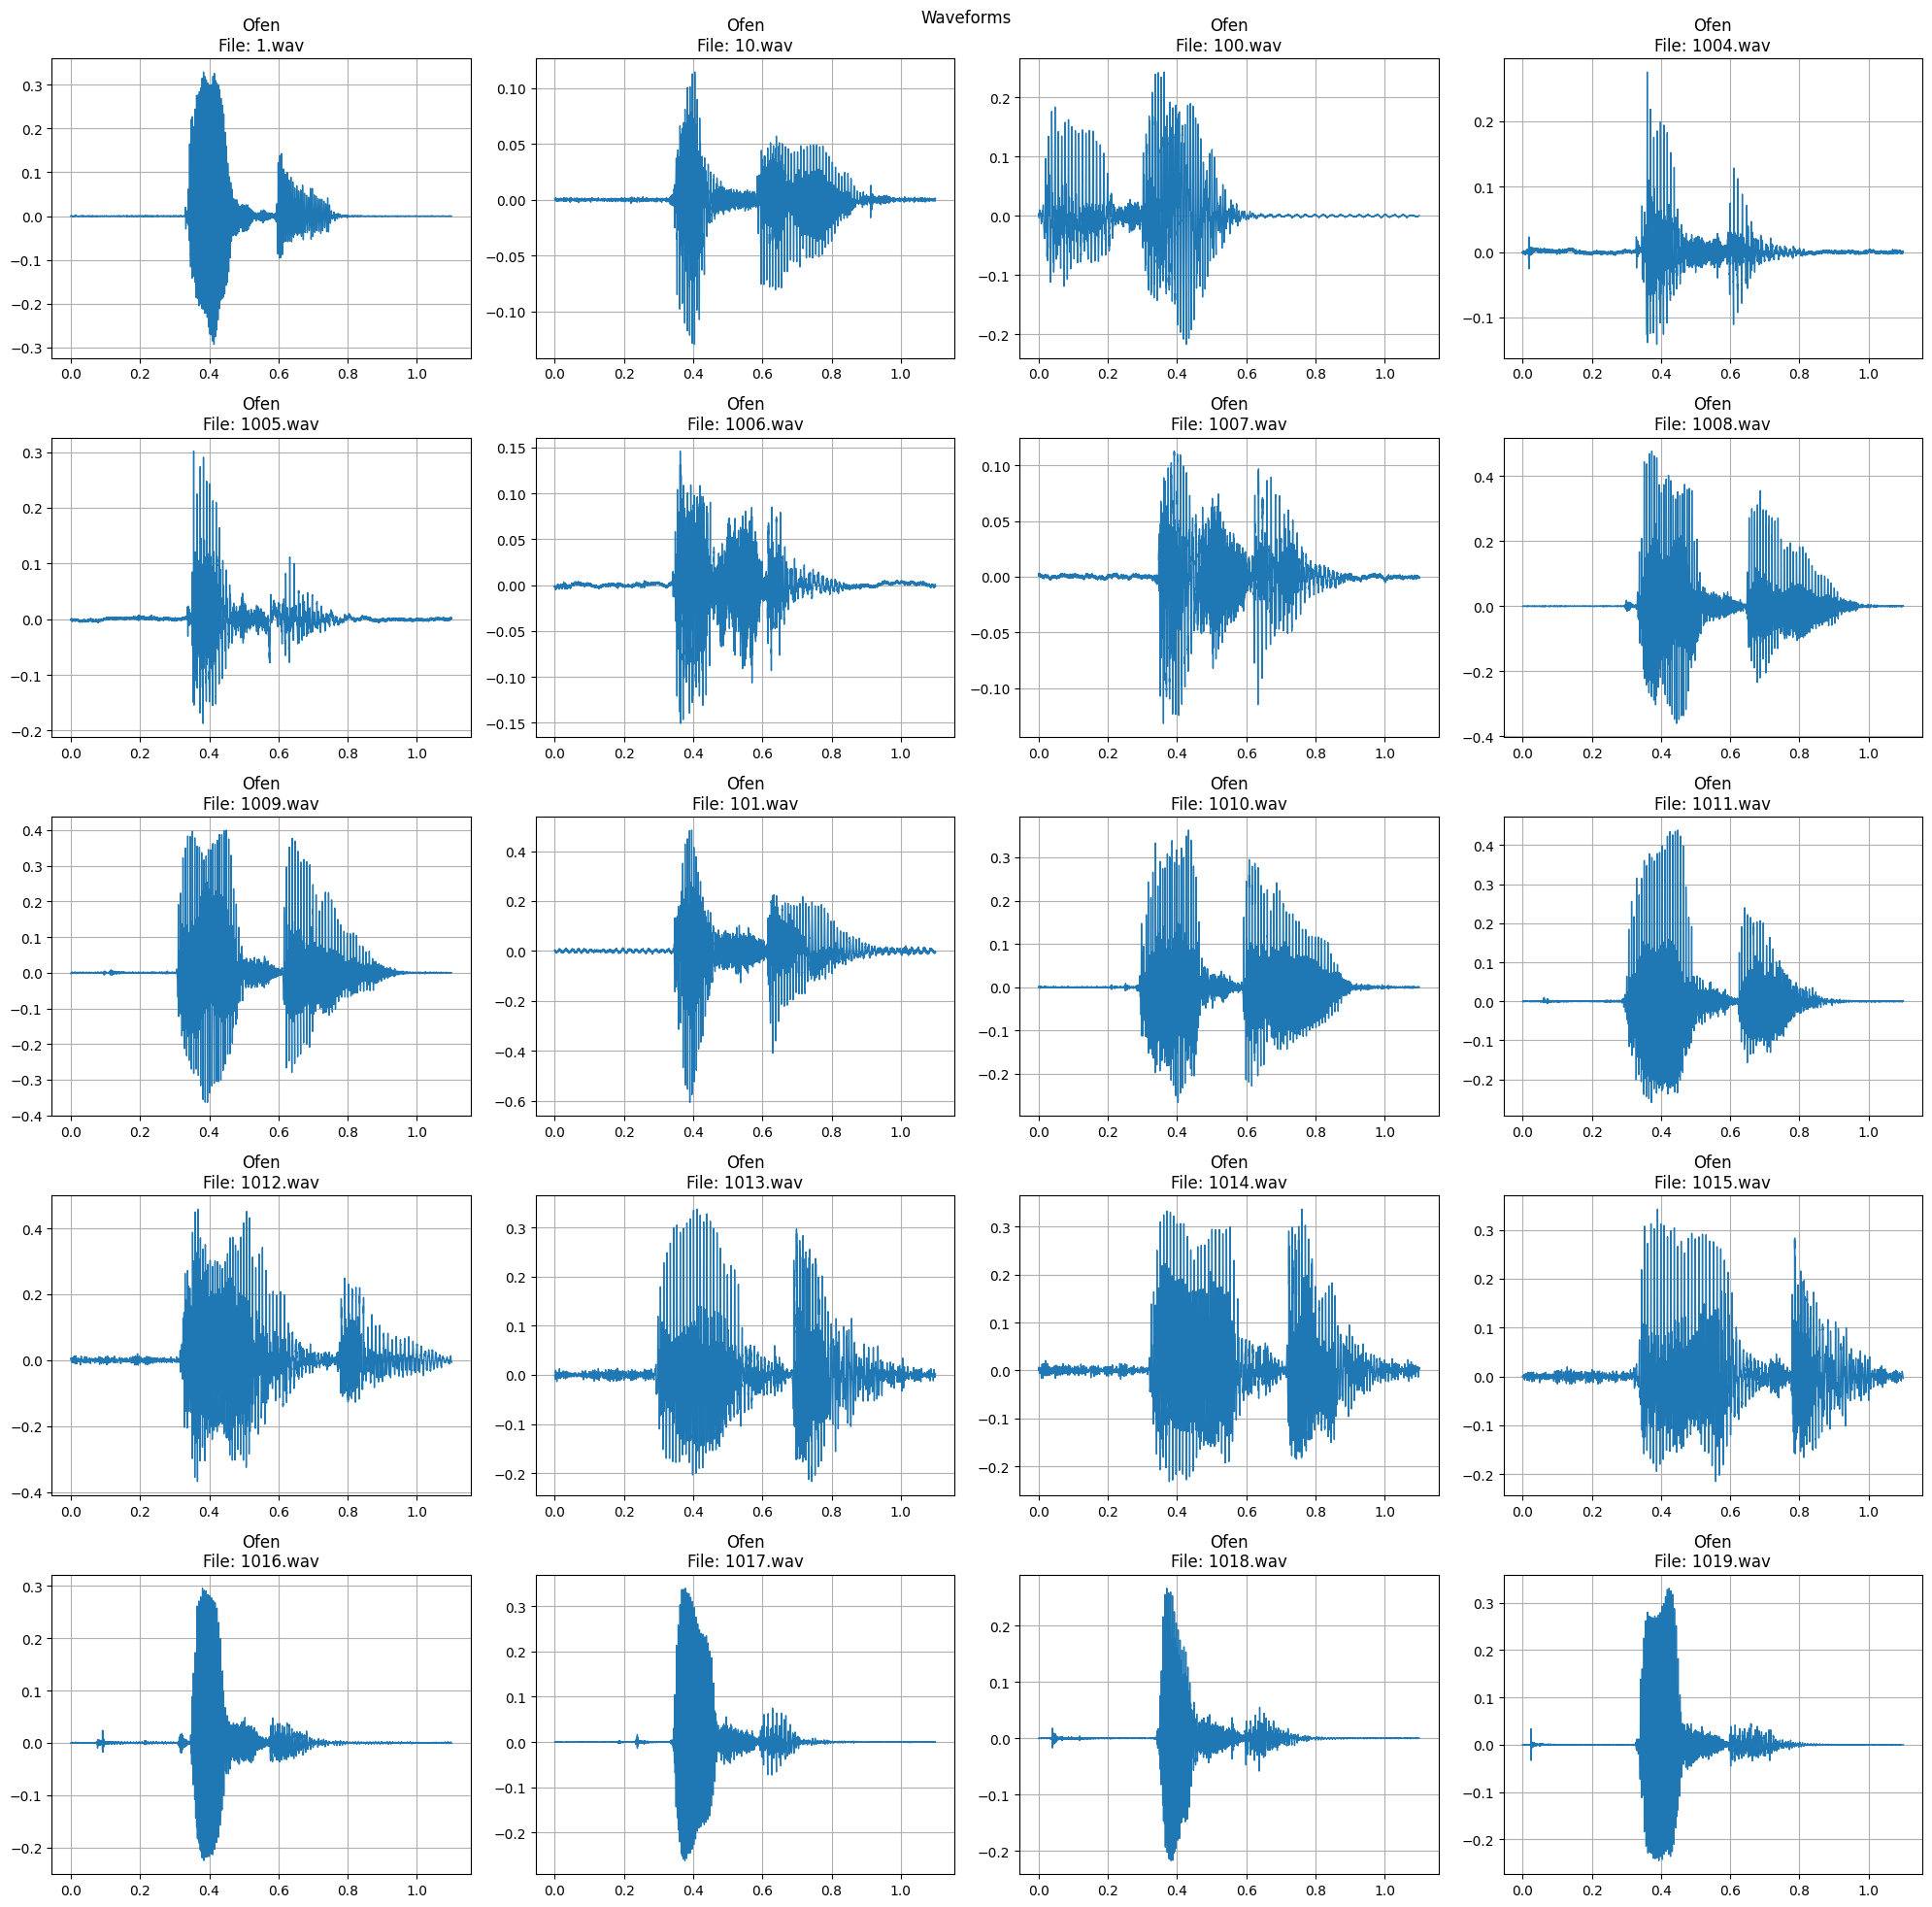

In [241]:
# NOT RANDOM
my_sample_class = "Ofen"
my_list_idx = 100
start_pos = 0

audios = {}
for i in range(start_pos, 20):
    filename = annotated_classes_dict[my_sample_class][i]
    waveform, sample_rate = torchaudio.load(filename)
    audios[i] = (filename, waveform, sample_rate)

plot_waveform_matrix(audios)

## 2.4 Now we want to compare samples from 2 different classes

In [242]:
# just for copying the key you need...
for annotated_class, files in annotated_classes_dict.items():
    print(f"{annotated_class}", end = "    ")

Alarm    an    aus    Brötchen    Fernseher    Haus    Heizung    kann    Leitung    Licht    Lüftung    nicht    Ofen    offen    other    Radio    Schraube    Spiegel    Staubsauger    warm    wunderbar    

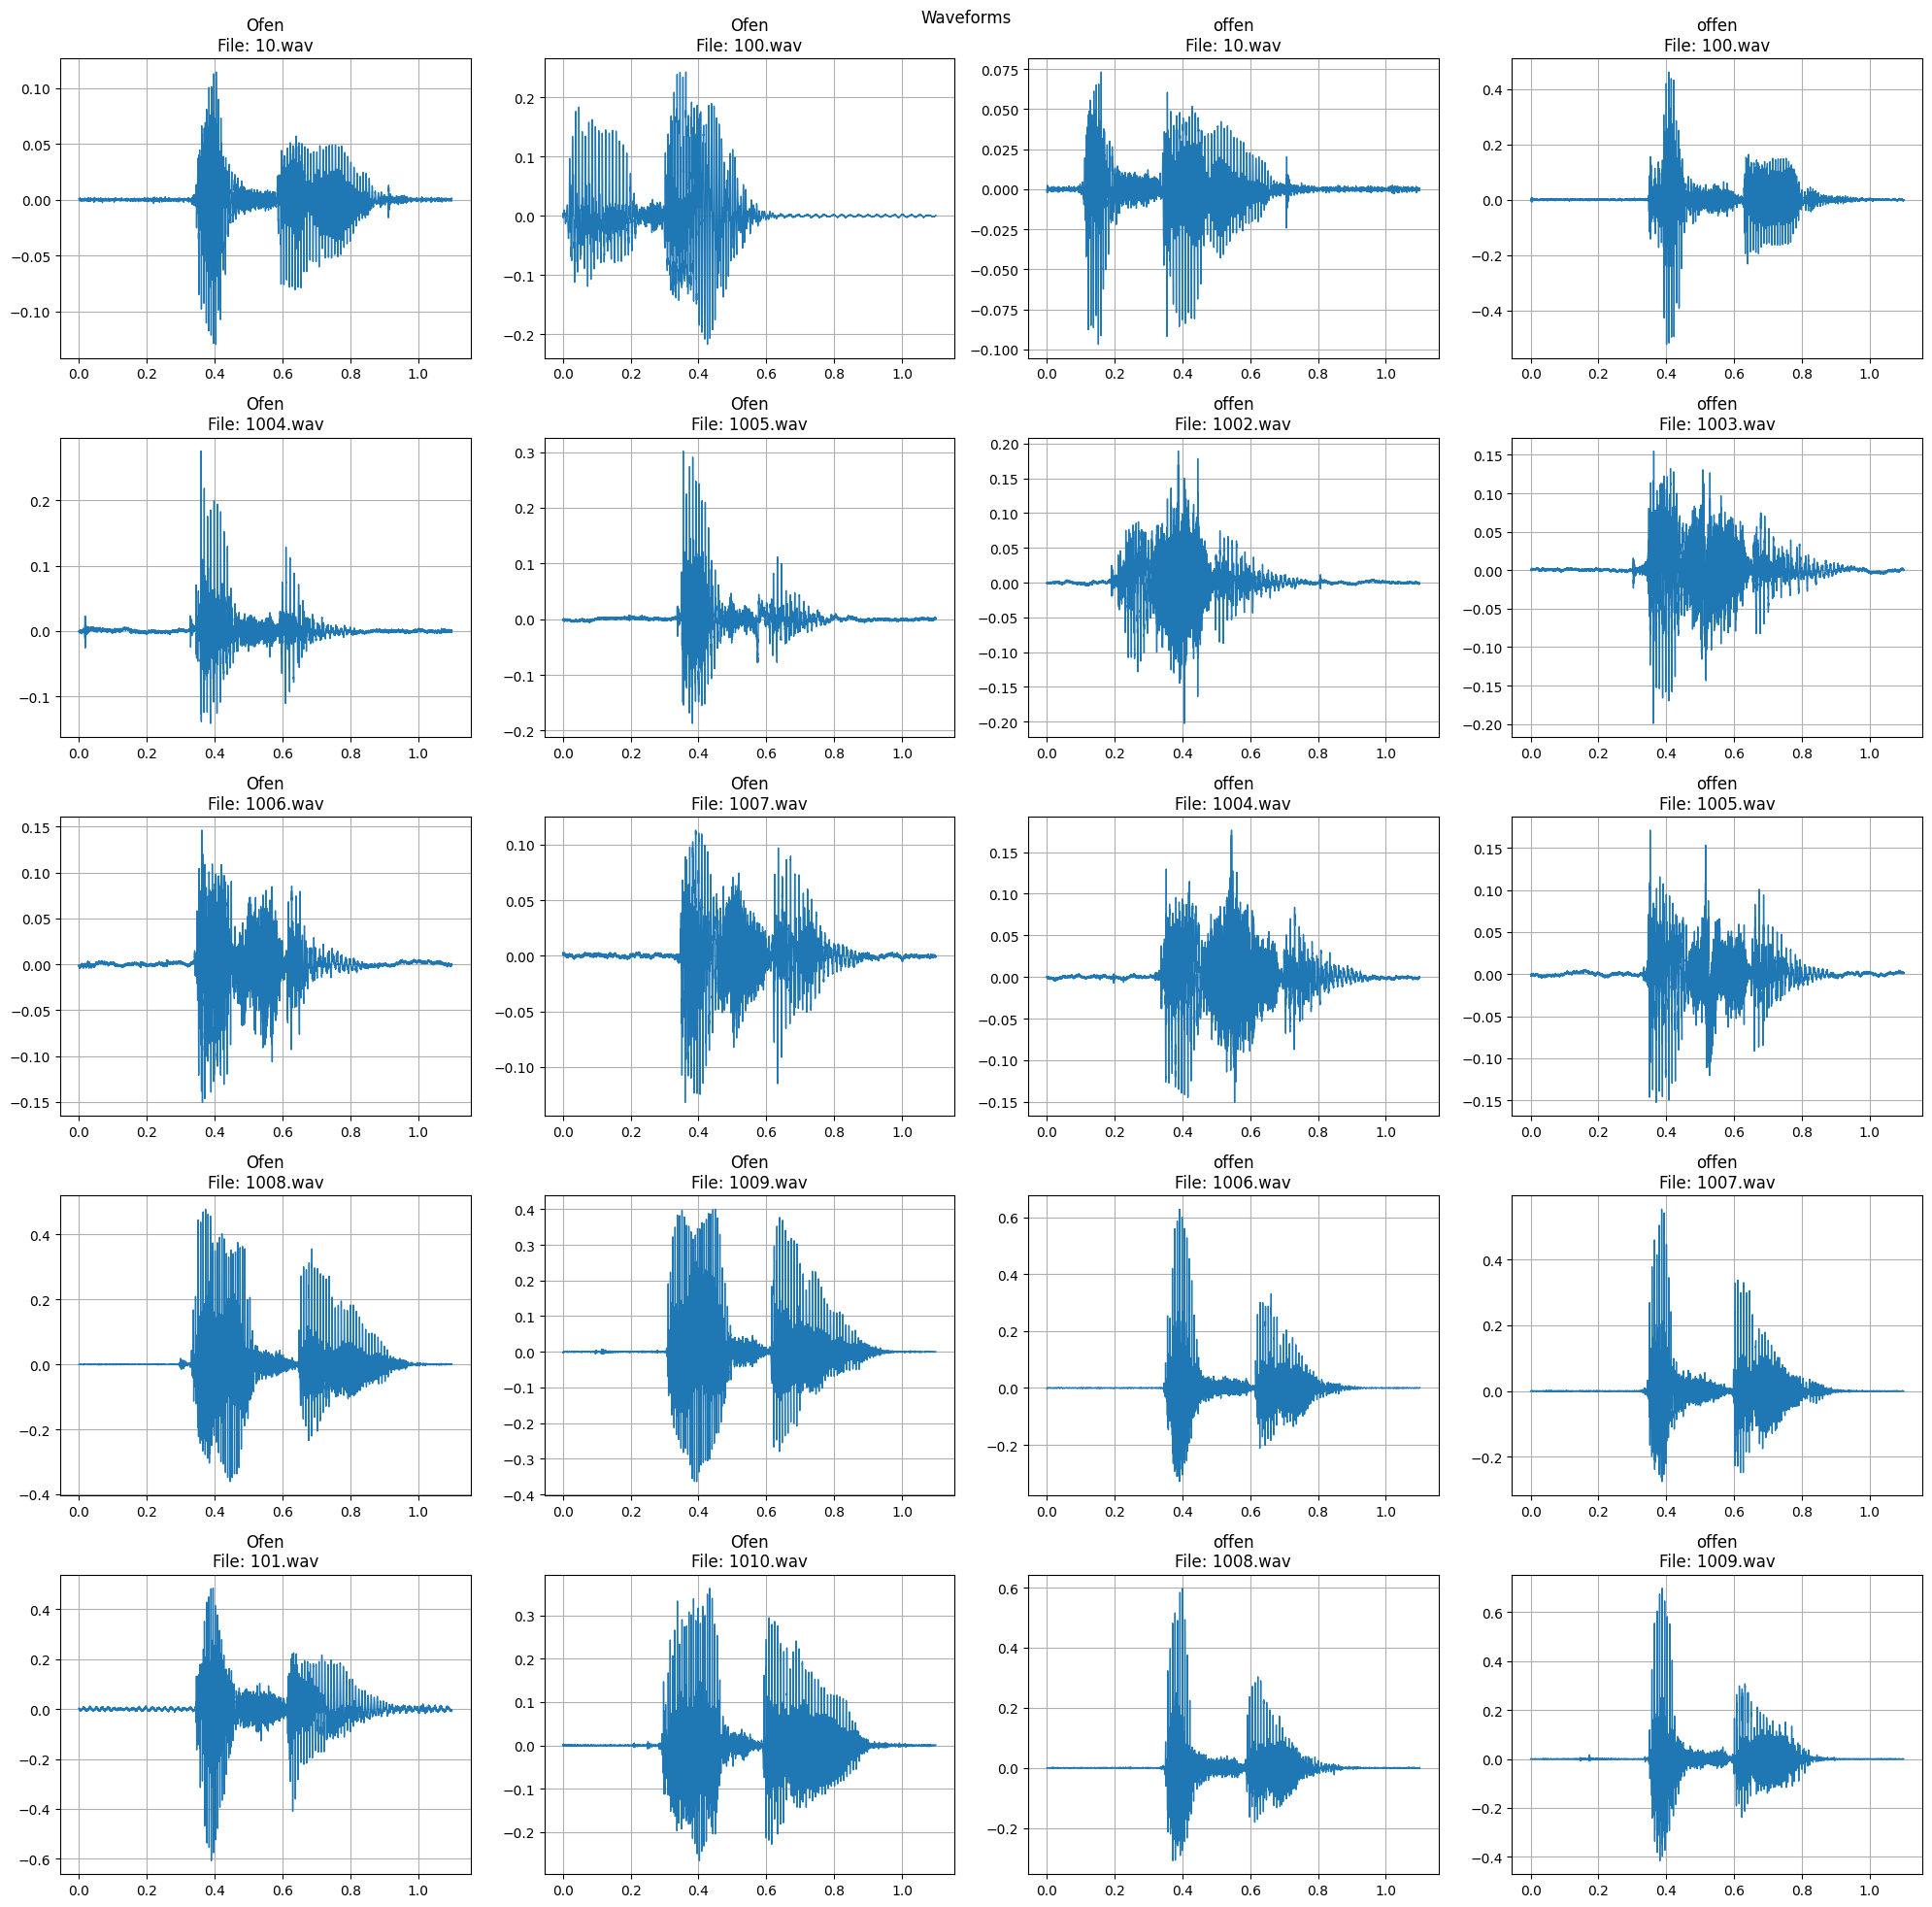

In [251]:
# NOT RANDOM
my_sample_class_1 = "Ofen"
my_sample_class_2 = "offen"
start_pos = 0
counter_1, counter_2 = 0, 0

audios = {}
for i in range(5):
    for j in range(4):
        if j <= 1:
            my_sample_class = my_sample_class_1
            counter_1 += 1
            counter = counter_1
        else:
            my_sample_class = my_sample_class_2
            counter_2 += 1
            counter = counter_2
        
        filename = annotated_classes_dict[my_sample_class][counter + start_pos]
        waveform, sample_rate = torchaudio.load(filename)
        audios[i*5 + j] = (filename, waveform, sample_rate)      
plot_waveform_matrix(audios)

In [252]:
# NOT RANDOM, you can choose and it stays the same
my_test_key = "offen"
my_test_sample = 9

print(f"The max len to choose is: {len(annotated_classes_dict[my_test_key])}")

print(f"Play some random audio file of key {my_test_key}...")
print("")

# play audio file
audio_file = annotated_classes_dict[my_test_key][my_test_sample]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

The max len to choose is: 2039
Play some random audio file of key offen...

Files/MLPC24_speech_commands_raw_waveforms\offen\1008.wav


# 3. Now lets check the numpy features (which is the main task)

## 3.1 Plot 1 feature 

This is 1 feature (which we saw earlier...)

In [258]:
# just for copying...
print(indices_dict)

{'bandwidth': (0, 0), 'centroid': (1, 1), 'contrast': (2, 8), 'energy': (9, 9), 'flatness': (10, 10), 'flux': (11, 11), 'melspect': (12, 75), 'mfcc': (76, 107), 'mfcc_d': (108, 139), 'mfcc_d2': (140, 171), 'power': (172, 172), 'yin': (173, 173), 'zcr': (174, 174)}


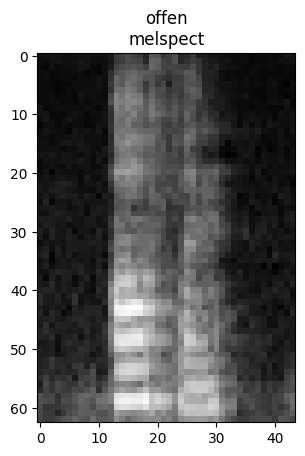

In [269]:
# plot a 2D image (here melspect)
my_test_key = "offen"
my_feature = "melspect"

data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio)

plt.title(f"{data[0]}\n{my_feature}")
if indices_dict[my_feature][0] - indices_dict[my_feature][1] != 0:
    plt.imshow(np.flipud(data[2][indices_dict[my_feature][0]:indices_dict[my_feature][1],:]), cmap="gray")
else:
    plt.plot(data[2][indices_dict[my_feature][0]])

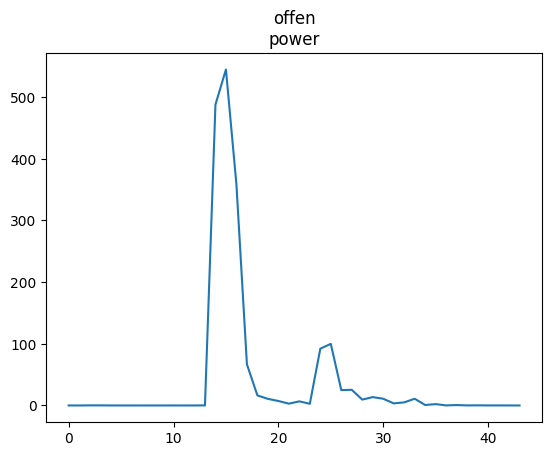

In [267]:
# plot a 1d plot (here power)
my_test_key = "offen"
my_feature = "power"

data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, my_test_sample)

plt.title(f"{data[0]}\n{my_feature}")
if indices_dict[my_feature][0] - indices_dict[my_feature][1] != 0:
    plt.imshow(np.flipud(data[2][indices_dict[my_feature][0]:indices_dict[my_feature][1],:]), cmap="gray")
else:
    plt.plot(data[2][indices_dict[my_feature][0]])

## 3.2 Plot a feature matrix with all features in one matrix... :-)

In [294]:
list(indices_dict.keys())

['bandwidth',
 'centroid',
 'contrast',
 'energy',
 'flatness',
 'flux',
 'melspect',
 'mfcc',
 'mfcc_d',
 'mfcc_d2',
 'power',
 'yin',
 'zcr']

In [325]:
desired_order_list = ["melspect", 
                      "mfcc",
                      "mfcc_d",
                      "mfcc_d2",
                      "energy",
                      "power",
                      "yin",
                      "zcr",
                      "bandwidth",
                      "centroid",
                      "flatness",
                      "flux",
                      "contrast"]
reordered_dict = {k: indices_dict[k] for k in desired_order_list}

# Example usage:
print(reordered_dict)

{'melspect': (12, 75), 'mfcc': (76, 107), 'mfcc_d': (108, 139), 'mfcc_d2': (140, 171), 'energy': (9, 9), 'power': (172, 172), 'yin': (173, 173), 'zcr': (174, 174), 'bandwidth': (0, 0), 'centroid': (1, 1), 'flatness': (10, 10), 'flux': (11, 11), 'contrast': (2, 8)}


In [332]:
def plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, start=0, random=False):

    fig, axes = plt.subplots(4, 4, figsize=(20, 20))

    # Iterate over each feature in indices_dict
    for i, (feature_name, feature_indices) in enumerate(reordered_dict.items()):
        data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, i)
        row = i // 4
        col = i % 4

        # Make sure to define and assign 'filename' variable properly before using it
        filename = "your_file_path_here"

        axes[row, col].set_title(f"{feature_name}")
        
        if feature_indices[0] - feature_indices[1] != 0:
            axes[row, col].imshow(np.flipud(data[2][feature_indices[0]:feature_indices[1], :]), cmap="gray")
        else:
            axes[row, col].plot(data[2][feature_indices[0]])
        
        axes[row, col].grid(True)
            
    fig.suptitle(f"Audio Features \"{my_test_key}\"")
    plt.tight_layout()


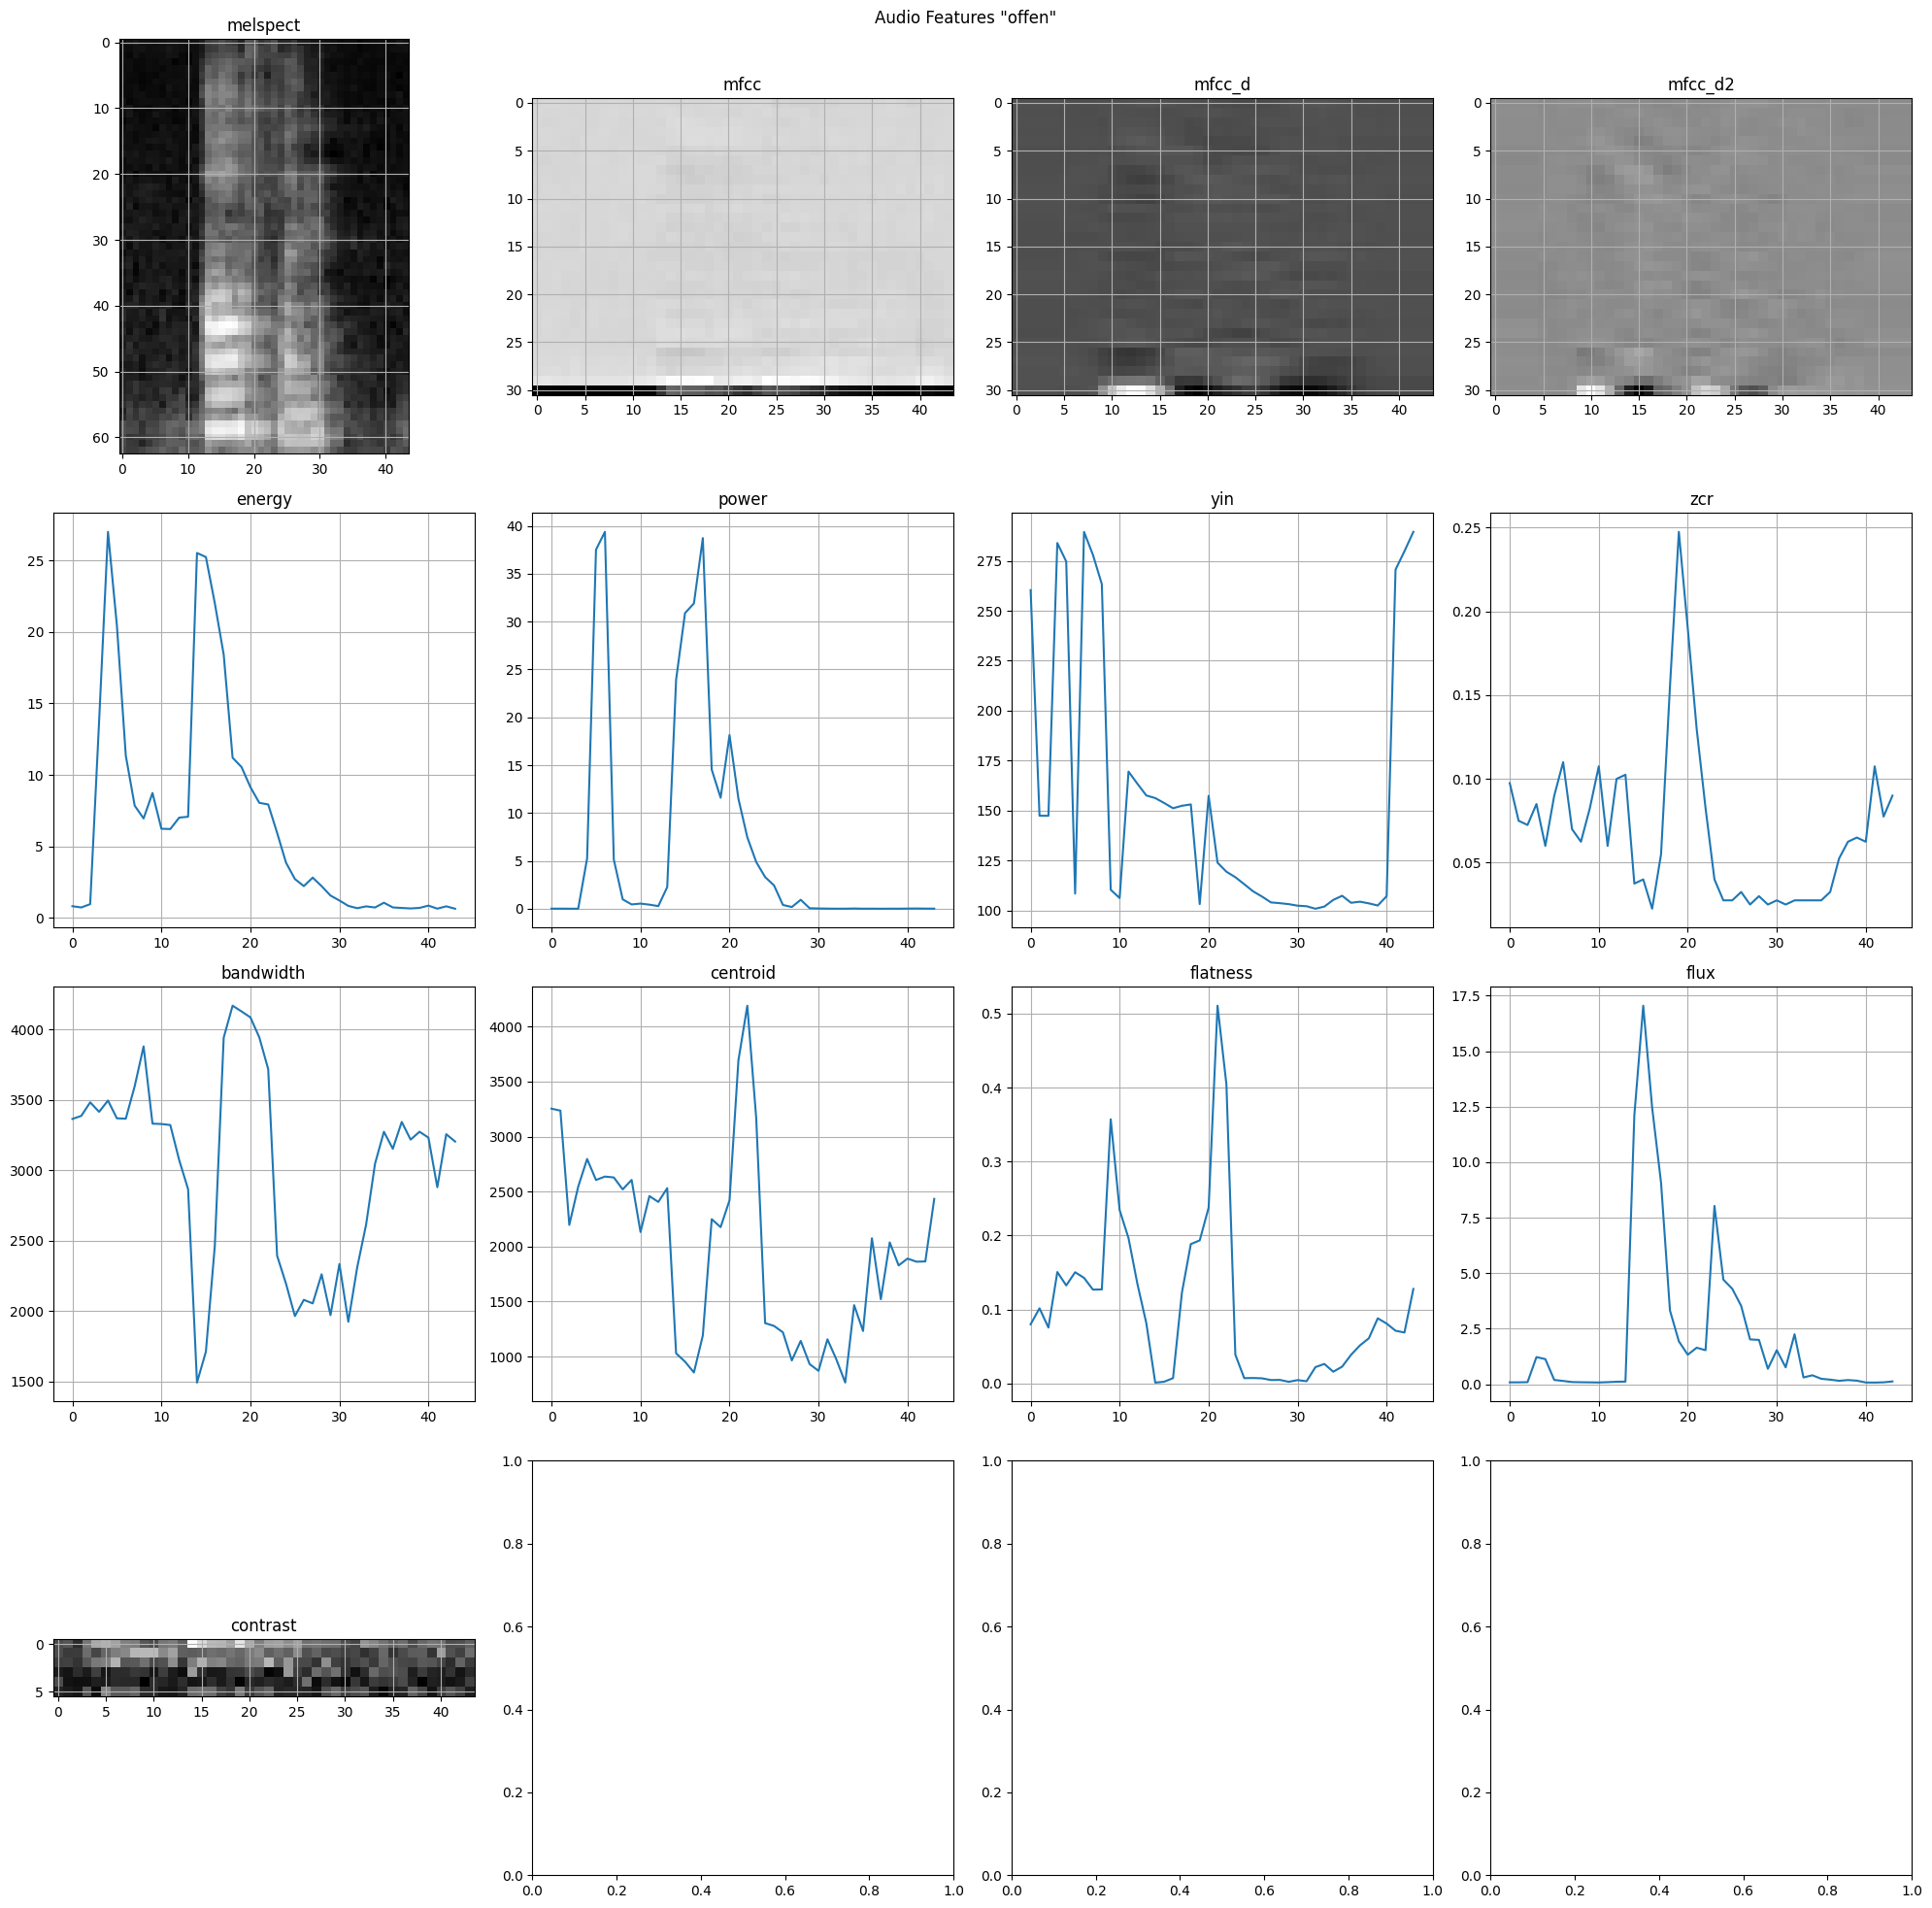

In [333]:
my_test_key = "offen"
plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, i)

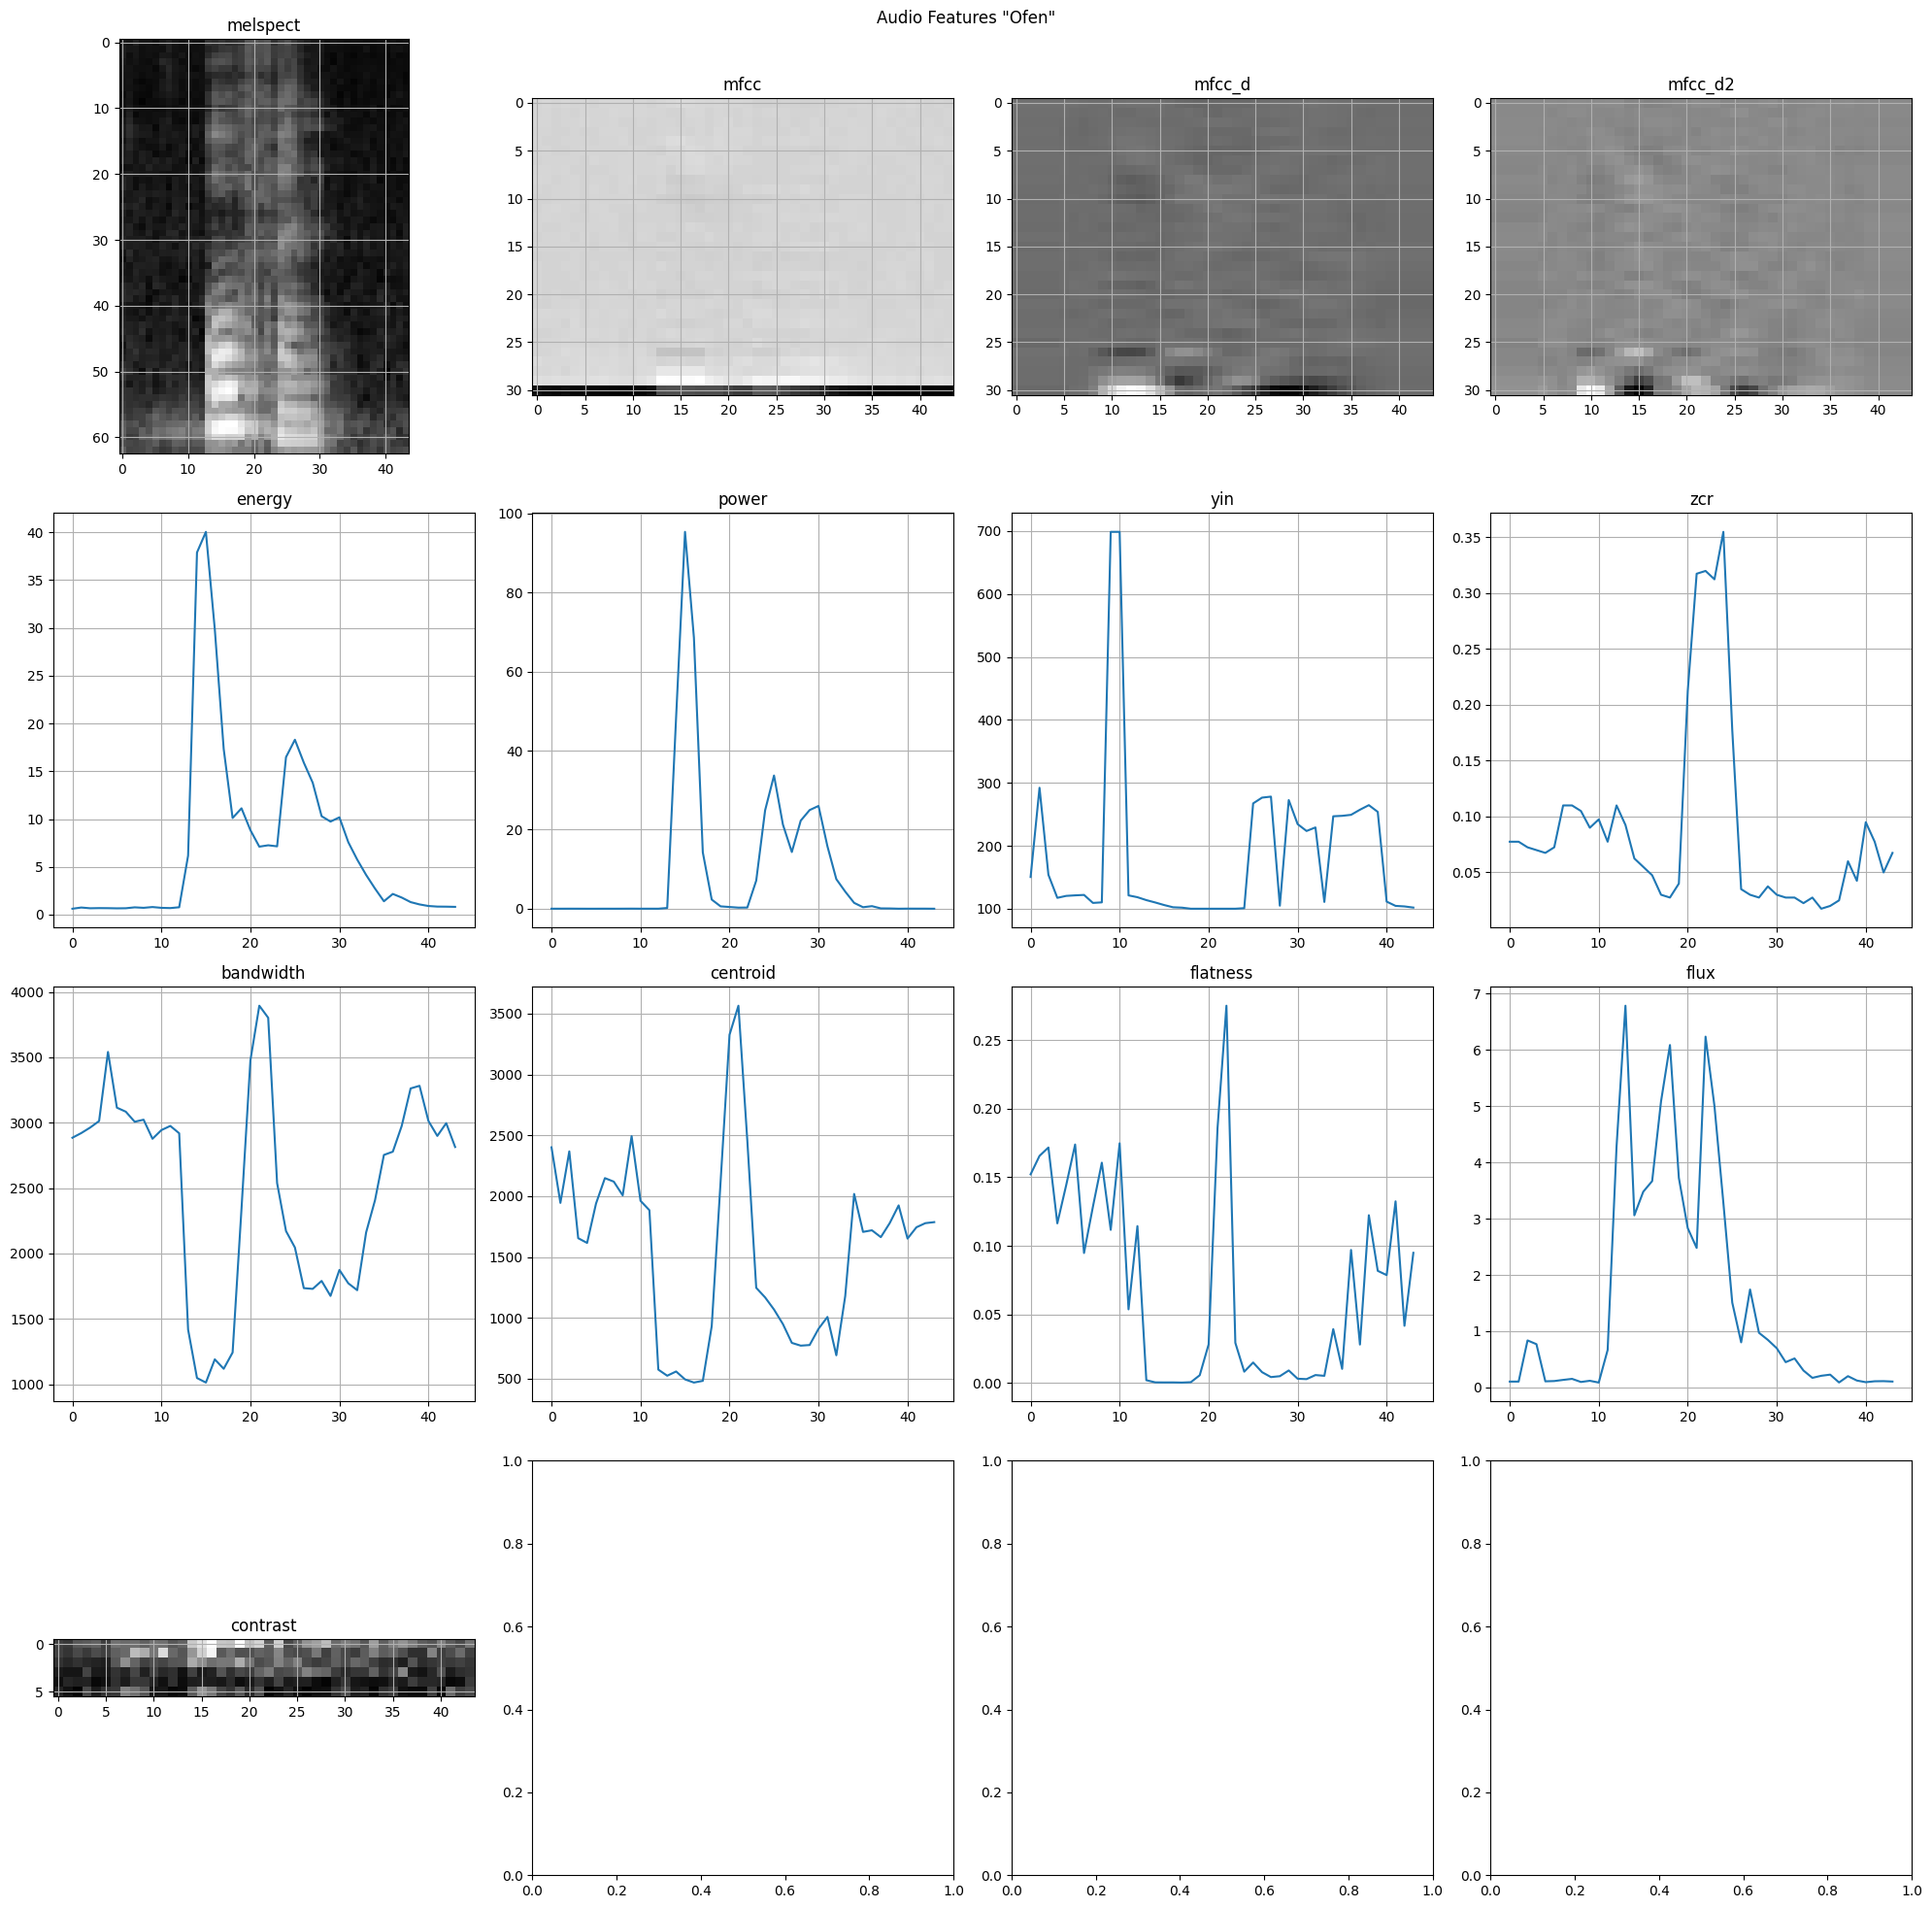

In [334]:
my_test_key = "Ofen"
plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, i)